В этом ноутбуке мы запускаем библиотеку для оптического распознавания символов (OCR) EasyOCR.

EasyOcr лучше запускать вместе с CUDA и GPU. В Colab нужно в меню Среда выполнения выбрать "Сменить среду выполнения" -> T4.
Оценим работу OCR на двух изображениях: одно конвертировано из текста в jpg, второе снято на камеру телефона.

In [ ]:
# Установим EasyOCR.
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 18.5 MB/s eta 0:00:00


In [ ]:
# Импортируем его.
import easyocr

In [ ]:
# Создадим переменную, в которой сохраним инструмент для распознавания русского языка.
reader = easyocr.Reader(['ru'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [ ]:
# Скачаем два изображения, которые я подготовил заранее.
!wget 'https://drive.google.com/uc?export=download&id=1PRiLR8Zmlj6u-BwWC7Xk5h97aXQdHHXb' -O 'image1.jpg'
!wget 'https://drive.google.com/uc?export=download&id=1ev93S2QV9xy0d7zzpzc4fe1U20Da3J1s' -O 'image2.jpg'

--2024-12-10 17:45:14--  https://drive.google.com/uc?export=download&id=1PRiLR8Zmlj6u-BwWC7Xk5h97aXQdHHXb
Resolving drive.google.com (drive.google.com)... 172.217.194.102, 172.217.194.101, 172.217.194.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.194.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1PRiLR8Zmlj6u-BwWC7Xk5h97aXQdHHXb&export=download [following]
--2024-12-10 17:45:14--  https://drive.usercontent.google.com/download?id=1PRiLR8Zmlj6u-BwWC7Xk5h97aXQdHHXb&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.68.132, 2404:6800:4003:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.68.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83106 (81K) [image/jpeg]
Saving to: ‘image1.jpg’

image1.jpg          100%[===================>]  81.16K  --.-KB/s    in 0.001s  

20

In [ ]:
# Изображения можно посмотреть, нажав на значок "Папка" на панели слева и дважды
# кликнув на имя файла. А можно и посмотреть их здесь.
from PIL import Image

image1 = Image.open('image1.jpg')
image2 = Image.open('image2.jpg')

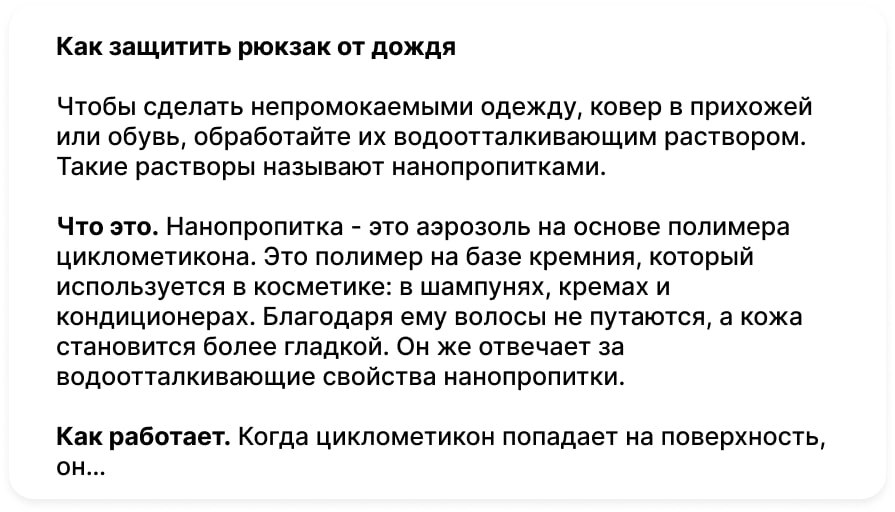

In [ ]:
image1

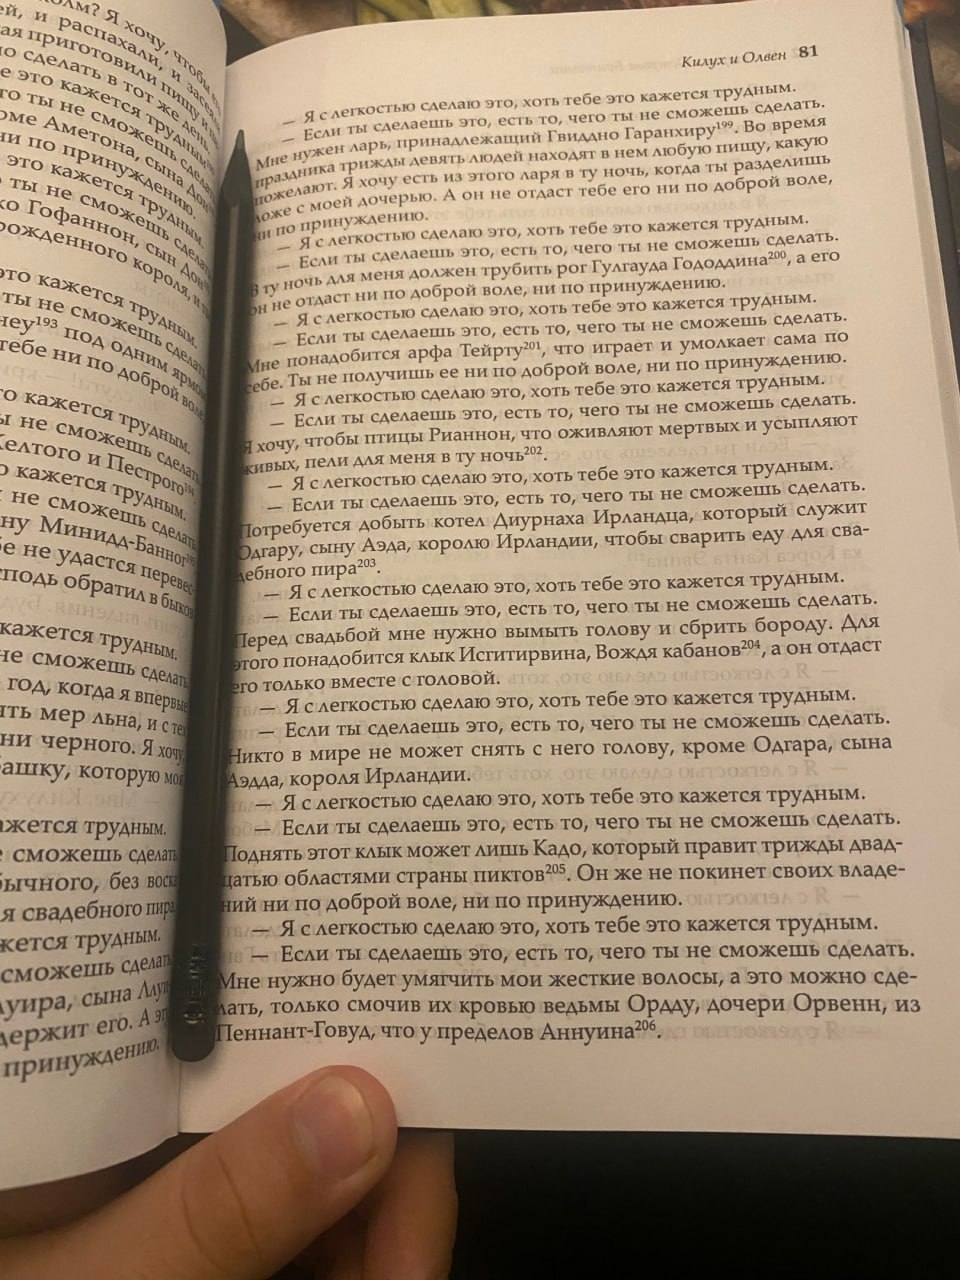

In [ ]:
image2

In [ ]:
# Посмотрим, как инструмент справится с более легким текстом.
# Параметр detail=0 нужен, чтобы получить только текст.
# Параметр paragraph=True разобьет текст на параграфы.
result = reader.readtext('image1.jpg', detail=0, paragraph=True)
print(result)
# Вроде, красивое.

['Как защитить рюкзак от дождя', 'Чтобы сделать непромокаемыми одежду, ковер в прихожей ИЛИ обувь обработайте их водоотталкивающим раствором: Такие растворы называют нанопропитками', 'Что это. Нанопропитка это аэрозоль на основе полимера циклометикона: Это полимер на базе кремния, который используется в косметике: в шампунях, кремах и кондиционерах: Благодаря ему волосы не путаются, а кожа становится более гладкой: Он же отвечает за водоотталкивающие свойства нанопропитки.', 'Как работает. Когда циклометикон попадает на поверхность, ОН.:']


In [ ]:
# Здесь похуже. Но и сфоткал я специально криво - строки расположены под наклоном,
# поэтому распознанные строки и даже слова сливаются и путаются, и на параграфы
# текст разбить не удалось.
# Да и текст я выбрал с редкими словами. Чем текст оригинальнее, тем хуже
# распознается.
result = reader.readtext('image2.jpg', detail=0, paragraph=True)
print(result)

['\'И; зАм? ая распахахи; хочу сАе^ать приготовихи Килих и ОАбён   81 это 1 го ты кажется тот пинту  6 не Еже сАеао это хотъ тебе это кажетсж еруАсАемать: Бме Я € Аеткостью это естъ то чего ты не сможешь Аметона сможешь = . Ескн ты сАехаешь Гвиддно Гаранхируто_ Во время шИ по труАным= \'нужен Аарь; принадАежащий Аевять АЮАей наХоАяТ нем Аюбую пищу, какую это сына Мне \' Тиочуесевятз этоте Ааря в ту ночъ, КОТАа ты раздекишь ты кажется принужАению, прамАниАа Я хочу отАаст тебе его ни по Аоброй воке; не 7 ппожмеают о моен 4очерью он \'Це Гофаннон; сможешь труАным . пже ш1 по принуждентпю  это хоть тебе это кажется тРуАным. рожАенного Я с АеГкостью сАе^аюо сАек есть 7 0 чего ГК] не сможешь сАехать:  сын Ески \'Ъ сАехаешь это, 200 трубить рог ГуАгауда ГоАОААина а его то \'коромя, 7 \'ночъ шя меня доАжен  кажется ни по доброи воле ни по принужАению: ты не эн не отАаст € Аегкостью сдеаю ЭТО, хоть тебе это кажется труАным. 1еу19з сможешь труАным . это, есть То, чего ты не сможешь сАе^ать: гебе